# I. Introduction

In this assignmnt, I mainly review the four classification models, pocke, qda, lda and logistic regression, and based on what we have learnt in machine learning class, I give the model implementations and use dataset from UCI to test the models. 

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 

## Introduce data

Source of the data
UCI Machine Learning Repository:
Adult Data Set
https://archive.ics.uci.edu/ml/datasets/Adult

Number of Instances: 32561

Number of Attributes: 14

Attribute Characteristics: Categorical, Integer

Associated Tasks: Classification

Listing of attributes: 

- more than 50K, less or equal to 50K. 
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.




## Reading the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data and assign the column names.
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country", "Class"  ])          
df.info()
df.describe()
list(df.columns.values)
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                 32561 non-null int64
workclass           32561 non-null object
fnlwgt              32561 non-null int64
education           32561 non-null object
education-number    32561 non-null int64
marital-status      32561 non-null object
occupation          32561 non-null object
relationship        32561 non-null object
race                32561 non-null object
sex                 32561 non-null object
capital-gain        32561 non-null int64
capital-loss        32561 non-null int64
hours-per-week      32561 non-null int64
native-country      32561 non-null object
Class               32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-number',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'Class']

## Preprocessing of the data

In [3]:
# Test on missing value
missVal_df = (df.isnull().sum()/len(df)) * 100
print(missVal_df)

age                 0.0
workclass           0.0
fnlwgt              0.0
education           0.0
education-number    0.0
marital-status      0.0
occupation          0.0
relationship        0.0
race                0.0
sex                 0.0
capital-gain        0.0
capital-loss        0.0
hours-per-week      0.0
native-country      0.0
Class               0.0
dtype: float64


In [4]:
# Process the category attribute
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country", "Class" ], skipinitialspace=True, header=None)          
df.loc[df['Class'].str.contains(">50K"), 'Class'] = 1
df.loc[df['Class'].str.contains("<=50K", na=False), 'Class'] = 0
df['sex_num'] = np.where(df.sex == 'Female', 0, 1)
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
df['marital_num'] = df['marital-status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

df.head()

,age,workclass,fnlwgt,education,education-number,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Class,sex_num,workclass_num,marital_num,race_num,rel_num
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,1,1.0,3,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,1,3.0,4,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,1,0.0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,1,0.0,4,1,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0.0,4,1,1


In [5]:
# remove rows where occupation is ?
df = df[df.occupation != '?']

Next, we use boxplot below to check whether there is any outlier values. We can see that hours-per-week has some value that seems to be outliers, which is because some people may not working at all, some may work for almost 100 hours per week.

Text(0.5,1,'hours-per-week')

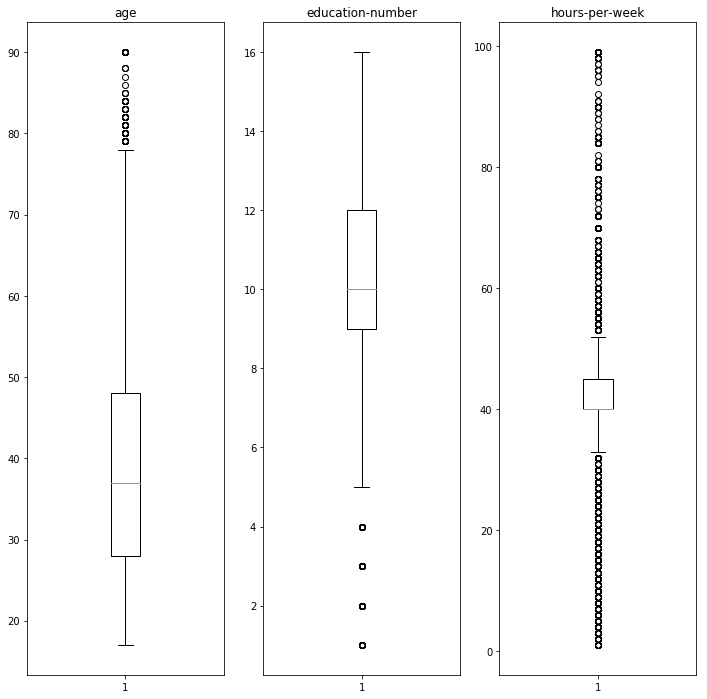

In [27]:
fig, axes = plt.subplots(nrows=1,ncols=3, sharex=False, sharey=False)
fig.set_size_inches(12, 12)

axes[0].boxplot(df.age)
axes[0].set_title('age')

axes[1].boxplot(df["education-number"])
axes[1].set_title('education-number')

axes[2].boxplot(df["hours-per-week"])
axes[2].set_title('hours-per-week')

Then, we use heatmap below to find out whether some of the numerical values have certain relations that we can discover. From the heatmap below, we can see 'Class' has relationship with 'rel_num', 'education-number', 'marital_num' and so on.

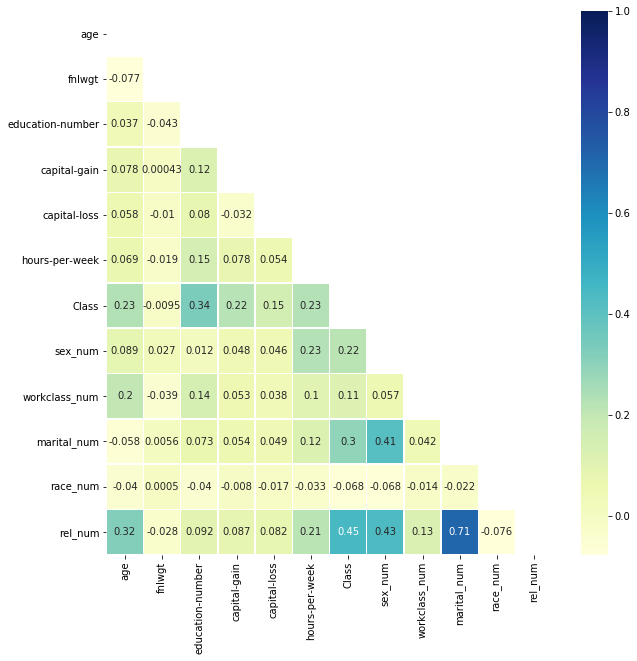

In [28]:
plt.figure(figsize=(10,10))

mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df.corr(), mask=mask, cmap="YlGnBu", annot=True, linewidths=.5)

## Visualize data

We first use violinplot below to find the relation between 'education-number' and 'Class', we can see that people earn less than 50k tend to have a 9 years education, and people who earn more than 50k, theie education is longer, the peak appears at 13 years.

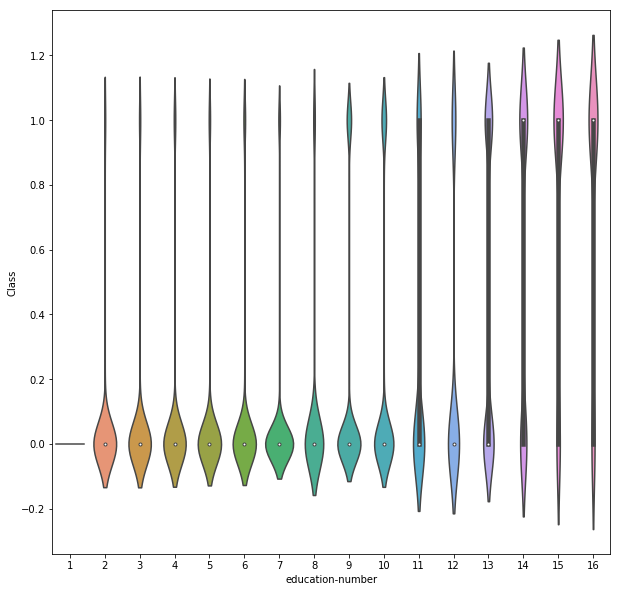

In [29]:
plt.figure(figsize=(10,10))
sns.violinplot(x="education-number", y="Class", data=df)

Next, we analyis education level with the money they earn. From the countplot result below, we can see that high school graduate make the main part of less than 50k, and bachelors rank the first of earning more than 50k, which is reasonable, when people have higher educaiton, they acquire more knowledge and skills, which can give them better change to make more money.

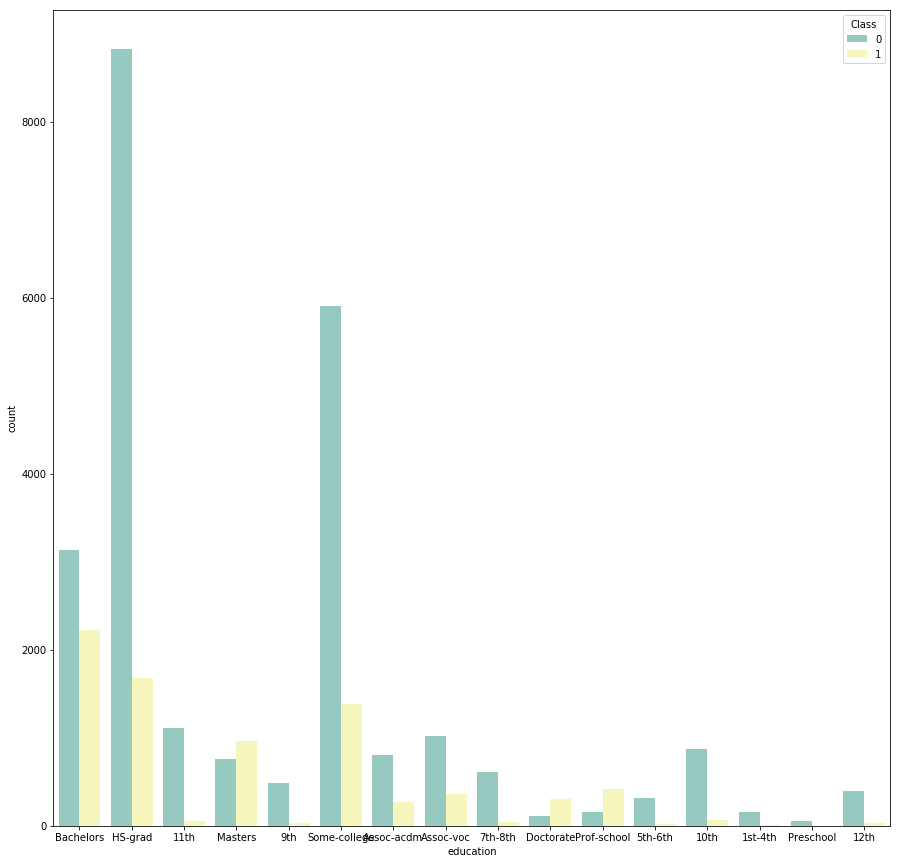

In [31]:
plt.figure(figsize=(15,15))
sns.countplot(x="education", hue="Class", palette="Set3", data=df)

As to the race. We can see from the countplot below, white people make the most money, no matter less than or more than 50k.

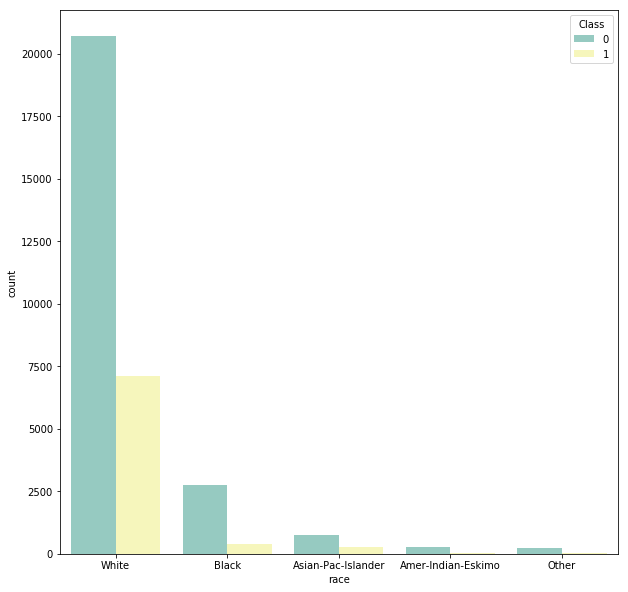

In [32]:
plt.figure(figsize=(10,10))
sns.countplot(x="race", hue="Class", palette="Set3", data=df)

## Observations about the data

1. We can see eople earn less than 50k tend to have a 9 years education, and people who earn more than 50k, theie education is longer, the peak appears at 13 years.

2. We can see that high school graduate make the main part of less than 50k, and bachelors rank the first of earning more than 50k, which is reasonable, when people have higher educaiton, they acquire more knowledge and skills, which can give them better change to make more money.

3. We can see white people make the most money, no matter less than or more than 50k.

# III. Method

Summarize the pocket algorithm, discriminant analysis, and logistic regression.
The superclass *Classifier* defines common utility methods. 
Finish the normalize function for you. 
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the 4 classification models 
 - your implementation and description


## Review of Pocket Algorithm

Pocket is based on the Perceptron Algorithm

First of all, we will review the perceptron algorithm, let us consider a simple binary classifcation as our target problem. 
A single perceptron is a linear model that applies a step function on the linear output. 
For classification, it iterate over the training examples, and update the weights in a way that would result in correct classification. 

Let us consider the case of misclassification. 
For positive class example, $x_i$, 

$$
y_i = w^{(k)} x_i < 0.
$$

To fix this classification error, we want to update the weight $w^{(k)}$ to increase the output $y_i$.
Thus, we expect

$$
 w^{(k+1)} x_i >  w^{(k)} x_i.
$$

This can be reached by using $x_i$ as a gradient as follows: 

$$
w^{(k+1)} = w^{(k)} + \alpha x_i
$$

where $\alpha$ is the learning rate. 

When the sample $t_i$ is negative, we need to do the opposite

$$
 w^{(k+1)} x_i <  w^{(k)} x_i.
$$

To combine both positive and negative cases, we can use the target sample $t_i$ in our update, 

$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$


When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best. 


To overcome the unstability of perceptron algorithm, the pocket algorithm keeps the best solution so far *in its pocket*. Thus, $w_{pocket}$ will contain the best solution so far.  

## Implementation and description of Pocket Algorithm

We define the 'train' fuction to get the 'w_pocket' and we define the 'use' fuction to get the predic value.

compare function was used to compare w and wp. so that we can choose the better value.

please refer part of the code below:

In [ ]:
# The train function
 def train(self, X, T):      
        X1 = self.add_ones(X)
        if self.w is None:
            self.w = [0.0]* X1.shape[1]
            self.wp = [0.0]* X1.shape[1]
        for i in range(self.maxiter):  
            for k in range(X1.shape[0]):
                yi = np.sign(X1[k]@self.w)
                if(yi*T[k]<=0):
                    self.w =self.w + self.alpha * T[k] * X1[k]
                    flag = self.compare(X1, T)
                    if ((k>1) and (np.sum(self.w - self.wp) < 0.01)):
                        self.converge = True
                    if(flag == 1):
                        self.wp = self.w
                    else:
                        self.w = self.wp
                    
            if self.converge is True:
                break
        return

    # The use function, which applies the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        re = np.sign(X1@self.w)  
        if (len(re.shape)==1): 
            re = re[:,np.newaxis]
        re[re==0]=1
        return re

## Review of QDA

When we have a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid x)$ for the sample $x$ with the positive label. Thus, 

$$
P(T = +1 \mid x) > P(T = -1 \mid x).
$$

The inequality will be the opposite in case of the negative samples. 

To build our model to meet this expectation, we can play with the algebra a little bit. 

$$
\begin{align*}
  P(T = +1 \mid x) &> P(T = -1 \mid x) \\
  \\
  \frac{P(x \mid T = +1) P(T = +1)} { P(x) } &> \frac{P(x \mid T = -1) P(T = -1)} { P(x) } \\
  \\
  P(x \mid T = +1) P(T = +1)  &> P(x \mid T = -1) P(T = -1) \\
  \\
  \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_+ \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (x - \boldsymbol\mu_+)} P(T = +1)  &>
  \Big( (2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_- \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (x - \boldsymbol\mu_-)} P(T = -1) \\
  \\
  \Big( \vert \boldsymbol\Sigma_+ \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (x - \boldsymbol\mu_+)} P(T = +1)  &>
  \Big( \vert \boldsymbol\Sigma_- \vert^{\frac{1}{2}} \Big)^{-1} e^{ -\frac{1}{2} (x - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (x - \boldsymbol\mu_-)} P(T = -1) 
\end{align*}
$$

Logarithm can remove exponent and multiplication for easier computation:

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (x - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (x - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (x - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (x - \boldsymbol\mu_-) + \ln P(T = -1)
$$

From the observation that both terms have the same cosmetics, we can define the discriminant function $\delta_k(x)$ as

$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{x}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{x}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$. 

Since the $\delta_k$ function is quadratic in $x$, the decision boundary is quadratic. 
We call this approach as **Quadratic Discriminant Analysis (QDA)**. 

## Implementation and description of QDA

We define the 'train' function with inpuet X, N1, N2, N, from train funciton, we can get mu1, mu2, Sigma1, Sigma2, prior1, prior2; and after we get these paramaters, we define 'use' function to get our prediction.

Please refer part of the code below.

In [ ]:
 # The train function, in this function, we can get mu1, mu2, Sigma1, Sigma2, prior1, prior2
    def train(self, X, N1, N2, N):
        
        Xs = self.normalize(X)
        print(Xs[:N2])
        mu1 = np.mean(Xs[:N2], 0)
        mu2 = np.mean(Xs[N2:], 0)
        
        Sigma1 = np.cov(Xs[:N1].T)
        Sigma2 = np.cov(Xs[N1:].T)
        prior1 = N1 / N
        prior2 = N2 / N       
        print(Sigma1)       
        return mu1, mu2, Sigma1, Sigma2, prior1, prior2
    
# Use function, with this function, we can get our prediction.
    def use(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)

## Review of LDA

Maintaining the covariance matrix is not cheap. Considering the input dimension $d$, the symmetric covariance meetric contains $\frac{d (d+1)}{2}$. 

Also, the data is undersampled, the resulting class boundary has high chance of overfitting. 

Simply using the same covariance for all the classes, we can reach the **linear discriminant analysis** model, which can overcome the stated problems above. 
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 

$$
\begin{align*}
\delta_+(x) &> \delta_-(x) \\
\\
-\frac{1}{2} \ln \vert \boldsymbol\Sigma \vert - \frac{1}{2} (x - \boldsymbol\mu_+)^\top \boldsymbol\Sigma^{-1} (x - \boldsymbol\mu_+) + \ln P(T = +1) &> -\frac{1}{2} \ln \vert \boldsymbol\Sigma \vert - \frac{1}{2} (x - \boldsymbol\mu_-)^\top \boldsymbol\Sigma^{-1} (x - \boldsymbol\mu_-) + \ln P(T = -1)\\
\\
 - \frac{1}{2} (x - \boldsymbol\mu_+)^\top \boldsymbol\Sigma^{-1} (x - \boldsymbol\mu_+) + \ln P(T = +1) &>  - \frac{1}{2} (x - \boldsymbol\mu_-)^\top \boldsymbol\Sigma^{-1} (x - \boldsymbol\mu_-) + \ln P(T = -1)\\ 
 \\
 - \frac{1}{2} \Big[ x^\top \boldsymbol\Sigma^{-1}x  -2 x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ +  \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ \Big] + \ln P(T = +1) &>  - \frac{1}{2} \Big[ x^\top \boldsymbol\Sigma^{-1}x  -2 x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- +  \boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_- \Big] + \ln P(T = -1)\\
 \\
 x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$

Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$





##  Implementation and description of LDA

We define the 'train' function to get the paramaters, mu1, mu2, Sigma, prior1, prior2. and we define the use function to make prediction.

Please refer the code below

In [ ]:
# The train function
    def train(self, Xs, N1, N2, N):
        means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
        Xs = (Xtrain - means) / stds

        mu1 = np.mean(Xs[:N1], 0)
        mu2 = np.mean(Xs[N1:], 0)

        Sigma = np.cov(Xs.T)

        prior1 = N1 / N
        prior2 = N2 / N
        
        return mu1, mu2, Sigma, prior1, prior2
    
# The use function, is used for make prediction.    
    def use(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)


## Review of Logistic Regression

Previously we discussed about using least squres to fit on the discrete target for classification.
When dealing with multiple classes, it can cause masking problem that one class estimation is masked by other predictions. 

Now, we consider a linear regression model that directly predicts $P(T=k \mid x)$, not the class label $k$. 
We call this approach as **Logistic Regression**. 

Again, let us use the same linear model for regression: 

$$
\kappa = f(x ; w) = X w.
$$

Thus,

$$
P(T=k \mid x) = h(X w) = h(\kappa) = y.
$$

### Target

To generate multiple probability outputs for each class, we consider the indicator output targets. 

$$
T = \begin{bmatrix}
        t_{1,1} & t_{1,2} & \cdots & t_{1, K} \\
        t_{2,1} & t_{2,2} & \cdots & t_{2, K} \\
        \vdots & & &     \vdots \\
        t_{N,1} & t_{N,2} & \cdots & t_{N, K} \\
      \end{bmatrix}
$$
where $t_{n,k}$ is 0 or 1 with only one 1 per each row. 

Note: Here the weight $w$ is not a vector any more. It is matrix with $D+1 \times K$ dimensions.


### Likelihood

Assuming i.i.d (independently identically distributed) data, we can compute the likelihood as

$$
P(T \mid w) = \prod_{n=1}^{N} \prod_{k=1}^{K} P(T = k \mid x_n)^{t_{n,k}} = \prod_{n=1}^{N} \prod_{k=1}^{K} y_{n,k}^{t_{n,k}}
$$

Since we maximize the likelihood function, we define our error function as the negative logarithm of it:

$$
E(w) = - \ln P(T \mid w) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

This function is called *cross-entropy* error function for the multiclass classification problem. 


### Gradient Descent

As we practiced in least mean squares, we need to update the weight $w$ with the gradient:

$$
w \leftarrow w - \alpha \nabla_w E(w).
$$
with the learning rate $\alpha$. 


#### Softmax Transformation

Before computing the derivative, let us select the function $h(\cdot)$. 

Since $P(T=k \mid x)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one. 

To ensure this,

$$
P(T=k \mid x) = \frac{\kappa_k}{\sum_{c=1}^K \kappa_c}
$$

Since we are working with the logarithm, an exponent is a good idea.

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

This function is called as **softmax function**. This generalizes the logistic sigmoid fuunction and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$


#### Back to Derivative

Here, 

$$
\begin{align*}
\nabla_{w_j} g_{n,k}(x) &= g_k(x) (I_{kj} - g_j(x)) \nabla_{w_j} (w^\top x) \\
    \\
            &= g_k(x) (I_{kj} - g_j(x))  x.
\end{align*}
$$


$$
\begin{align*}
\nabla_{w_j} E(w) &= \nabla_{w_j} \Big(-\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln g_{n,k}(x_n) \Big) \\
                      \\
                      &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \frac{1}{g_{n,k}(x_n)} \nabla_{w_j} g_{n,k}(x_n)\\
                      \\
                      &= -\sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} (I_{kj} - g_j(x_n)) x_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg( \sum_{k=1}^{K} t_{n,k} (I_{kj} - g_j(x_n)) \Bigg) x_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg( \sum_{k=1}^{K} t_{n,k} I_{kj} - g_j(x_n) \sum_{k=1}^{K} t_{n,k} ) \Bigg) x_n\\
                      \\
                      &= -\sum_{n=1}^{N} \Bigg(  t_{n,j} - g_j(x_n)\Bigg) x_n
\end{align*}
$$

Using the gradient, now we can update the weights, 

$$
w_j \leftarrow w_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

Converting the summation into matrix calculation,

$$
w_j \leftarrow w_j + \alpha X^\top \Big(  t_{*,j} - g_j(X)\Big).
$$


### Implementation 

Before writing codes, let us check the matrix size!

- $X: N \times (D+1)$
- $T: N \times K$


- $w: (D+1) \times K$
- $t_{*,j}: N \times 1 $
- $g_j(X): N \times 1 $


- $X^\top \big( t_{*,j} - g_j(X) \big)$: $(D+1) \times N \cdot \big( N \times 1 - N \times 1 \big) \Rightarrow (D+1) \times 1$

This gradient update one column of the weight matrix, so we can combine the computations:

$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

Double checking the size of matrics,

- $X^\top \big( T - g(X) \big)$: $(D+1) \times N \cdot \big( N \times K - N \times K \big) \Rightarrow (D+1) \times K$. 

## Implementation and description of Logistic Regression

We define the 'train' function, which will use the 'g' function, and the 'g' function will call the 'softmax' function. After training, we define the 'use' function to make prediction.

Please refer the code below:

In [ ]:
 # The train function
    def train(self, X, T): 
        
        means, stds = np.mean(X, 0), np.std(X, 0)
        # normalize inputs
        X = (X - means) / stds
        #X1 = np.hstack((np.ones((X.shape[0], 1)), X))
        X1 = np.hstack((np.ones((X.shape[0],1)), X))
        #T1 = self.add_ones(T)
        niter = 10
        alpha = 0.0001
        for step in range(niter):
            # TODO: add training code here! 
            ys = self.g(X1, self.w) 
            #print(ys)
            self.w += alpha * X1.T @ (T - ys)
        #print(X1)
        #print(self.w)
    
    # The use function
    def use(self, X):
        means, stds = np.mean(X, 0), np.std(X, 0)
        # normalize inputs
        X = (X - means) / stds
        X1t = np.hstack((np.ones((X.shape[0],1)), X))
        #X1t = self.add_ones(X)
        #print(self.w)
        Y = self.g(X1t, self.w)
        #Y = self.add_ones(Y)
        return Y

### A. Super Classs Definition

In [29]:
import numpy as np
import abc
from abc import ABC, abstractmethod
# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass


class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """
    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        Xs = (X - self.meanX) / self.stdX
        return Xs

   

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abc.abstractmethod
    def train(self, X, T):
        pass
    
    @abc.abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

In [8]:
from copy import deepcopy as copy 
class Pocket(Classifier): 
    def __init__(self):
        Classifier.__init__(self)
        self.maxiter = 100
        self.alpha = 0.1
        self.w = None
        self.wp = None
        self.converge = False
        
    def compare(self,X, T):
        if self.wp is None:
            return 1
        else:
            y = np.sign(X@self.w)
            yp = np.sign(X@self.wp)
            return 1 if np.sum(y == T) >= np.sum(yp == T) else -1


    def train(self, X, T):      
        X1 = self.add_ones(X)
        if self.w is None:
            self.w = [0.0]* X1.shape[1]
            self.wp = [0.0]* X1.shape[1]
        for i in range(self.maxiter):  
            for k in range(X1.shape[0]):
                yi = np.sign(X1[k]@self.w)
                if(yi*T[k]<=0):
                    self.w += self.alpha * T[k] * X1[k]
                    flag = self.compare(X1, T)
                    if ((k>1) and (np.sum(self.w - self.wp) < 0.001)):
                        self.converge = True
                    if(flag == 1):
                        self.wp = self.w
                    else:
                        self.w = self.wp
                    
            if self.converge is True:
                break
        return

    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        re = np.sign(X1@self.w)  
        if (len(re.shape)==1): 
            re = re[:,np.newaxis]
        re[re==0]=1
        return re
    


### C. QDA

In [2]:
class qda(Classifier): 
    
    def __init__(self, ):
        self.meanX = 0
        self.stdX = 0

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)
            self.meanX = np.mean(X, 0)
            self.stdX = np.std(X, 0)
            Xs = (X - self.meanX) / self.stdX
            return Xs
        
    def train(self, X, N1, N2, N):
        means, stds = np.mean(X , 0), np.std(X , 0)
        Xs = (X  - means) / stds
        mu1 = np.mean(Xs[:N1], 0)
        mu2 = np.mean(Xs[N1:], 0)
        Sigma1 = np.cov(Xs[:N1].T)
        Sigma2 = np.cov(Xs[N1:].T)
        prior1 = N1 / N
        prior2 = N2 / N    
        return mu1, mu2, Sigma1, Sigma2, prior1, prior2
    
    def use(self, X, mu, sigma, prior):
        means1, stds1 = np.mean(X , 0), np.std(X , 0)
        Xs = (X  - means1) / stds1
        sigma_inv = np.linalg.inv(sigma)
        diffv = Xs - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)

### D. LDA

In [104]:
class lda(Classifier): 
    
    def __init__(self, ):
        self.meanX = 0
        self.stdX = 0
    
    # The normalization function.
    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        Xs = (X - self.meanX) / self.stdX
        return Xs   
    
    def train(self, X, N1, N2, N):
        means, stds = np.mean(X, 0), np.std(X, 0)
        Xs = (X - means) / stds
        mu1 = np.mean(Xs[:N1], 0)
        mu2 = np.mean(Xs[N1:], 0)
        Sigma = np.cov(Xs.T)
        prior1 = N1 / N
        prior2 = N2 / N
        
        return mu1, mu2, Sigma, prior1, prior2
    
    
    def use(self, X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)


### E. Logistic Regression

In [100]:
class lg(Classifier):
    
    def __init__(self, ):
        self.meanX = 0
        self.stdX = 0
        # initialize the weight matrix
        D = 2
        K = 2
        self.w = np.random.rand(D+1, K)
        #self.w = np.zeros((D+1, K))
        #print(self.w)
        #w = np.zeros((D+1), K)


    # g(.) the softmax function
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # for linear fx
    def g(self, X, w):
        return self.softmax(X @ w) 
    
   
    # The train function
    def train(self, X, T): 
        
        means, stds = np.mean(X, 0), np.std(X, 0)
        # normalize inputs
        X = (X - means) / stds
        #X1 = np.hstack((np.ones((X.shape[0], 1)), X))
        X1 = np.hstack((np.ones((X.shape[0],1)), X))
        #T1 = self.add_ones(T)
        niter = 10
        alpha = 0.0001
        for step in range(niter):
            # TODO: add training code here! 
            ys = self.g(X1, self.w) 
            #print(ys)
            self.w += alpha * X1.T @ (T - ys)
        #print(X1)
        #print(self.w)
    
    # The use function
    def use(self, X):
        means, stds = np.mean(X, 0), np.std(X, 0)
        # normalize inputs
        X = (X - means) / stds
        X1t = np.hstack((np.ones((X.shape[0],1)), X))
        #X1t = self.add_ones(X)
        #print(self.w)
        Y = self.g(X1t, self.w)
        #Y = self.add_ones(Y)
        return Y

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Pocket Experiment

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [190]:
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country", "Class" ], skipinitialspace=True, header=None)          

# Set >50K as 1 and <=50K as -1
df.loc[df['Class'].str.contains(">50K"), 'Class'] = 1
df.loc[df['Class'].str.contains("<=50K", na=False), 'Class'] = -1

df['sex_num'] = np.where(df.sex == 'Female', 0, 1)
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
df['marital_num'] = df['marital-status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
#print(df.head())

# Because the training takes a lot of time, so pick 30% of the data
df = df.sample(frac=0.3)

# Define the Data for traing and testing.
X = df[['age', 'workclass_num', 'education-number', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss']]

y = df.Class

# We use train_test_split to set X_train, X_test, y_train, y_test part.
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
#print(y_test)


# As shown in previous heatmap. We choose the most related values'rel_num' and 'education-number' to form the train data and the test data.
X_trainP = np.array(X_train.iloc[:,[2,6]], dtype=np.float32)
X_testP = np.array(X_test.iloc[:,[2,6]], dtype=np.float32)

# Define y_trainP as train y of pocket algorithms experiment.
y_trainP = np.array(y_train)

y_testP = np.array(y_test)

In [193]:
pc = Pocket()
pc.train(X_trainP, y_trainP)
y_pred = pc.use(X_testP)

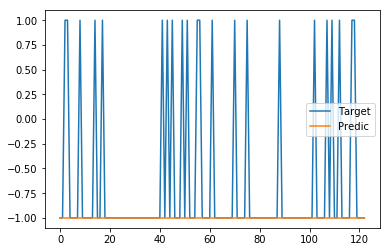

In [194]:
plt.plot(y_testP[0::20],  zorder=1,  label='Target')
plt.plot(y_pred[0::20], zorder=10,  label='Predic')
plt.legend()
plt.show()

In [199]:
from sklearn.metrics import accuracy_score
as1 = accuracy_score(y_testP, y_pred)
print(as1)

0.758804258804


## QDA Experiment

In [4]:
# Define the Data for traing and testing.
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country", "Class" ], skipinitialspace=True, header=None)          

# Set >50K as 1 and <=50K as 0
df.loc[df['Class'].str.contains(">50K"), 'Class'] = 1
df.loc[df['Class'].str.contains("<=50K", na=False), 'Class'] = -1

# Deal with the other category data.
df['sex_num'] = np.where(df.sex == 'Female', 0, 1)
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
df['marital_num'] = df['marital-status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

df1 = df[['age', 'workclass_num', 'education-number', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss','Class']]


# The first class is higher than 50k 
dfHigher50 = df1[df1.Class ==1]

# The second class is lower than 50k
dfLower50 =  df1[df1.Class ==-1]

# we pick 50% of higher_than_50k for the train data
dfHigher50Train = dfHigher50.sample(frac=0.5)

# We pick 50% of lower_than_50k for the test data
dfLower50Train = dfLower50.sample(frac=0.5)

# To keep the data in balance
dfLower50Train = dfLower50Train.sample(frac=0.3)

# C1 is made up of 'rel_num' and 'education-number' from 50% of higher_than_50k
C1 = np.array(dfHigher50Train.iloc[:,[2,6]], dtype=np.float32)
N1= C1.shape[0]
#print(N1)


# C2 is made up of 'rel_num' and 'education-number' from 50% of lower_than_50k
C2 = np.array(dfLower50Train.iloc[:,[2,6]], dtype=np.float32)
N2 = C2.shape[0]
#print(N2)

N = N1+N2

# We define the train data.
XTrain =  np.vstack((C1, C2))
#print(XTrain)


# we pick 50% of higher_than_50k for test data
dfHigher50Test = dfHigher50.sample(frac=0.5)

# We pick 50# of lower_than_50k for test data
dfLower50Test = dfLower50.sample(frac=0.5)

# To keep the testing data in balance
dfLower50Test = dfLower50Test.sample(frac=0.3)

# C3 is made up of 'rel_num' and 'education-number' from 50% of higher_than_50k
C3 = np.array(dfHigher50Test.iloc[:,[2,6]], dtype=np.float32)
N3 = C3.shape[0]
#print(N3)


# C4 is made up of rel_num' and 'education-number' from 50% of higher_than_50k
C4 = np.array(dfLower50Test.iloc[:,[2,6]], dtype=np.float32)
N4 = C4.shape[0]
#print(N4)

N0 = N3+N4

XTest = np.vstack((C3, C4))


D1 = dfHigher50Test['Class'].values.reshape(-1,1)
D2 = dfLower50Test['Class'].values.reshape(-1,1)

Ytest = np.vstack((D1, D2))

Ytest = np.array(Ytest)



In [5]:
qda = qda()

mu1q, mu2q, Sigma1q, Sigma2q, prior1q, prior2q = qda.train(XTrain, N1, N2, N)

d1q = qda.use(XTest, mu1q, Sigma1q, prior1q)

d2q = qda.use(XTest, mu2q, Sigma2q, prior2q)

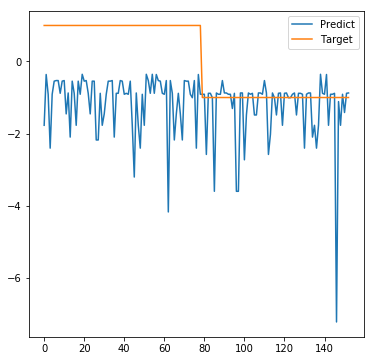

In [6]:
d1q = d1q.reshape(-1,1)
d2q = d2q.reshape(-1,1)
dq =  np.hstack((d1q, d2q))
dq = dq.max(axis=1)

YPred = dq.reshape(-1,1)

plt.figure(figsize=(6,6))
plt.plot(YPred[0::50], label='Predict')
plt.plot(Ytest[0::50], label='Target')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import accuracy_score
YPred = [int(item>-3) for  item in YPred]
as2 = accuracy_score(Ytest, YPred)
print(as2)

0.501310959622


## LDA Experiment

We use the same data prepration as QDA

In [105]:
lda = lda()

mu1, mu2, Sigma, prior1, prior2 = lda.train(XTrain, N1, N2, N)

d1 = lda.use(XTest, mu1, Sigma, prior1)
d2 = lda.use(XTest, mu2, Sigma, prior2)


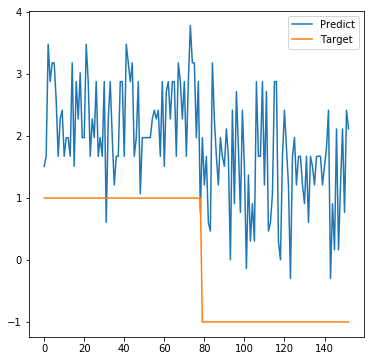

In [111]:
d1 = d1.reshape(-1,1)
d2 = d2.reshape(-1,1)
dq1 =  np.hstack((d1, d2))
dq1 = dq1.max(axis=1)

YPred1 = dq1.reshape(-1,1)

plt.figure(figsize=(6,6))
plt.plot(YPred1[0::50], label='Predict')
plt.plot(Ytest[0::50], label='Target')
plt.legend()
plt.show()

In [107]:
from sklearn.metrics import accuracy_score
YPred1 = [int(item>-3) for  item in YPred1]
as3 = accuracy_score(Ytest, YPred1)
print(as3)

0.513896171998


## Logistic Regression Experiment

In [99]:
# Define the Data for traing and testing.
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country", "Class" ], skipinitialspace=True, header=None)          

# Set >50K as 1 and <=50K as 0
df.loc[df['Class'].str.contains(">50K"), 'Class'] = 1
df.loc[df['Class'].str.contains("<=50K", na=False), 'Class'] = 0

# Deal with the other category data.
df['sex_num'] = np.where(df.sex == 'Female', 0, 1)
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
df['marital_num'] = df['marital-status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})

df1 = df[['age', 'workclass_num', 'education-number', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss','Class']]


# The first class is higher than 50k 
dfHigher50 = df1[df1.Class ==1]

# The second class is lower than 50k
dfLower50 =  df1[df1.Class ==0]

# we pick 50% of higher_than_50k for the train data
dfHigher50Train = dfHigher50.sample(frac=0.5)

# We pick 50% of lower_than_50k for the test data
dfLower50Train = dfLower50.sample(frac=0.5)

# To keep the data in balance
dfLower50Train = dfLower50Train.sample(frac=0.3)

# C1 is made up of 'rel_num' and 'education-number' from 50% of higher_than_50k
C1 = np.array(dfHigher50Train.iloc[:,[2,6]], dtype=np.float32)
N1= C1.shape[0]
#print(N1)


# C2 is made up of 'rel_num' and 'education-number' from 50% of lower_than_50k
C2 = np.array(dfLower50Train.iloc[:,[2,6]], dtype=np.float32)
N2 = C2.shape[0]
#print(N2)

N = N1+N2

# We define the train data.
X_trainl =  np.vstack((C1, C2))
#print(XTrain)


# we pick 50% of higher_than_50k for test data
dfHigher50Test = dfHigher50.sample(frac=0.5)

# We pick 50# of lower_than_50k for test data
dfLower50Test = dfLower50.sample(frac=0.5)

# To keep the testing data in balance
dfLower50Test = dfLower50Test.sample(frac=0.3)

# C3 is made up of 'rel_num' and 'education-number' from 50% of higher_than_50k
C3 = np.array(dfHigher50Test.iloc[:,[2,6]], dtype=np.float32)
N3 = C3.shape[0]
#print(N3)


# C4 is made up of rel_num' and 'education-number' from 50% of higher_than_50k
C4 = np.array(dfLower50Test.iloc[:,[2,6]], dtype=np.float32)
N4 = C4.shape[0]
#print(N4)

N0 = N3+N4

X_testl = np.vstack((C3, C4))


# Train data
D11 = dfHigher50Train['Class'].values.reshape(-1,1)
F11 = D11.shape[0]
#print(F11)
D22 = dfLower50Train['Class'].values.reshape(-1,1)
F22 = D22.shape[0]
#print(F22)
F=F11+F22
#print(F)


Y_trainl = np.zeros((F, 2))
#print(Ttrain.shape)
Y_trainl[:F11, 0] = 1
Y_trainl[F11:, 1] = 1


D1 = dfHigher50Test['Class'].values.reshape(-1,1)
F1 = D1.shape[0]
#print(F1)
D2 = dfLower50Test['Class'].values.reshape(-1,1)
F2 = D2.shape[0]
#print(F2)

Ft = F1+F2

Y_testl = np.zeros((Ft, 2))

Y_testl[:F1, 0] = 1
Y_testl[F1:, 1] = 1


In [101]:
lg = lg()
lg.train(X_trainl, Y_trainl)
ypred = lg.use(X_testl)


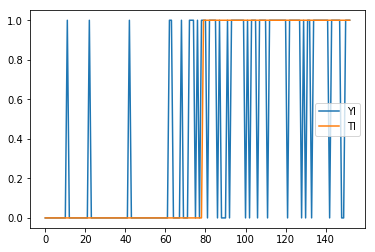

Accuracy:  78.6051389617 %


In [107]:
# retrieve labels and plot
#print(yprec)
Yl = np.argmax(ypred,1)

Tl = np.argmax(Y_testl, 1)

plt.plot(Yl[0::50], label='Yl')
plt.plot(Tl[0::50], label='Tl' )
plt.legend()
plt.show()

print("Accuracy: ", 100 - np.mean(np.abs(Tl - Yl)) * 100, "%")

## Discussion about evaluation metrics

- In this task, I mainly use accuracy_score from sklearn.metrics, accuracy algorithm learnt from logistic regression in our class as evaluation metrics. Moreover, I also plot the predic values and the true values to have a more vivid view.

- In pocket, qda, lda I use accuracy_score from sklearn.metrics as evaluation metrics, that is to compare the value between the predic value and the target value, in logistic regression, I use the accuracy algorithm given by our machine learning class, this metrics also aims to compare the predic value and the target value. 


## Discussion about train and test accuracies

- In order to make the prediction more accurate, I make balance data for the models that is sensitive to data imbalance.

- In order to keep consistent with what we have learnt in class, I pick two features for trainging and testing. Obviously, if picking more related value into training and testing, the predict accuracy will become higher.

- In the cridit part, I tried to use KFold from sklearn.cross_validation, and by train and test 5 times, which can effectively mediate the model unstable problems, by choosing the mean value of the precision score, we have a more stable result.

## Discussions about classificaion model comparison

- The linear coefficients are estimated differently, maximum likelihood estimation for logistic models and estimated mean and variance based on Gaussian assumptions for the LDA.  

- LDA makes more restrictive Gaussian assumptions and therefore expected to work better than logistic models if the assumptions are met. 

- QDA assumes a quadratic decision boundary, it can accurately model a wider range of problems than can the linear methods. 

- The logistic regression uses a logistic function and the perceptron(pocket) uses a step function.

# Conclusions

- Summarize your work here. 

In this assignment, I have practice on the four classification algorithms, pocket, QDA, LDA and Logistic Regression. from this assignment, I have gained deep understand on these algorithms.

- Which classifier do you think the best? 

I think logistic regression is best, which is widely used in classification.

- Discuss the challenges or somethat that you learned. 

I have learnt how to get the proper train data, and I have deeper understanding on the four classification model.

- If you have any suggestion about the assignment, you can write about it. 

# References

List all your references here:

https://www.kaggle.com/huyqtran/qda-lr-svm-for-fraud-detection

https://www.kaggle.com/kazimanil/adult-census-income-classification

http://uc-r.github.io/discriminant_analysis

https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

https://www.jianshu.com/p/67db19e6a52b

https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

https://datascienceplus.com/how-to-perform-logistic-regression-lda-qda-in-r/

https://onlinecourses.science.psu.edu/stat857/node/80/

https://chrisalbon.com/python/data_wrangling/pandas_replace_values/

# Extra Credit

* [OPT 1] Search for a ordinal data set and apply your classifiers to it. 
  - Repeat the experiments on it. 
  - Do you have different observation from previous results? 
  - Were you able to observe that we discussed in class about logistic regression? 
  - For a full extra credit point, you need to discuss all bullet points in Results section.     


* [OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors.  

[OPT 2] Partition your data into five sets. Selecting one test set and the other for training, repeat your experiments and observe/analyze the 5 different training/testing errors. 

I use 'Pocket model' to finish this task. 

Because the original dataset is huge, and traing/testing takes a lot of time, so I just choose randomly one third of the original data, therefor, the number of instance for this task is 9768.

Please refer the result below:

- Fold 1 accuracy: 0.7676560900716479
- Fold 2 accuracy: 0.7927328556806551
- Fold 3 accuracy: 0.7584442169907881
- Fold 4 accuracy: 0.7680491551459293
- Fold 5 accuracy: 0.8182283666154634
- Mean Accuracy: 0.7810221369008967

In [8]:
df = pd.read_csv("adult.csv", names = ["age", "workclass", "fnlwgt", "education","education-number", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss","hours-per-week", "native-country", "Class" ], skipinitialspace=True, header=None)          

# Set >50K as 1 and <=50K as -1
df.loc[df['Class'].str.contains(">50K"), 'Class'] = 1
df.loc[df['Class'].str.contains("<=50K", na=False), 'Class'] = -1

df['sex_num'] = np.where(df.sex == 'Female', 0, 1)
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
df['marital_num'] = df['marital-status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
#print(df.head())

# Because the training takes a lot of time, so pick 30% of the data

df = df.sample(frac=0.3)

# Define the Data for traing and testing.
X1 = df[['age', 'workclass_num', 'education-number', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital-gain', 'capital-loss']]

y1 = df.Class

In [9]:
X2 = df[['education-number', 'rel_num']]
print(X2.shape)
# Define y_trainP as train y of pocket algorithms experiment.
y2 = y1

(9768, 2)


In [10]:
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score

def run_kfold(model):
    kf = KFold(9768, n_folds=5)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X2.values[train_index], X2.values[test_index]
        y_train, y_test = y2.values[train_index], y2.values[test_index]
        model.train(X_train, y_train)
        predictions = model.use(X_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))     
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
pc1 = Pocket()
run_kfold(pc1)

Fold 1 accuracy: 0.7676560900716479
Fold 2 accuracy: 0.7927328556806551
Fold 3 accuracy: 0.7584442169907881
Fold 4 accuracy: 0.7680491551459293
Fold 5 accuracy: 0.8182283666154634
Mean Accuracy: 0.7810221369008967


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes.

To help our TA's grading, please make an explicit section for each grading criteria. 
Again, this is a **writing assignment**. Please don't forget to properly explain your codes and results using Markdown cell. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
25 | Methods | 
 |10| Summary of Classification models
 | 5| Explanation of codes
 |10| Pocket, LDA, QDA, Logistic Regression
40 | Experiments 
| 5| Discussion about evaluation metrics
| 5| Discussion about train and test accuracies
|20| plots for results (5 for each algorithm)
|10| Discussions about classificaion model comparison
5 | |Conclusions 
5 | |Referemces
5 | |Grammar and spelling error (Proofread please)